In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv("clean_data.csv", index_col=0)
df

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,total,date,time,payment,cogs,gross_margin_percentage,gross_income,rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46:00,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16:00,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22:00,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33:00,Cash,65.82,4.761905,3.2910,4.1


C:\Users\luisr\AppData\Local\Temp\ipykernel_22596\3376048094.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='branch', y='total', data=sales_by_branch, palette='viridis', alpha=0.8)


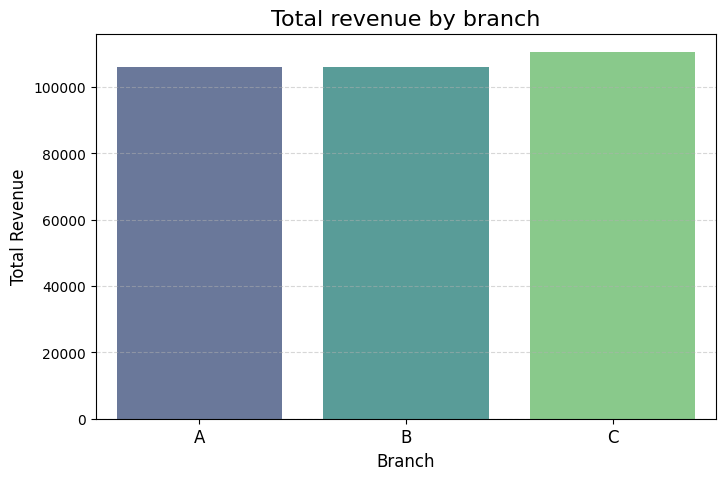

In [16]:
# Create bar charts to compare revenue by branch.

# Prepare data for Seaborn
sales_by_branch = df.groupby('branch')['total'].sum().round(2).reset_index()

# Create the bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x='branch', y='total', data=sales_by_branch, palette='viridis', alpha=0.8)

#Customize the chart
plt.title("Total revenue by branch", fontsize=16)
plt.xlabel("Branch", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.xticks(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

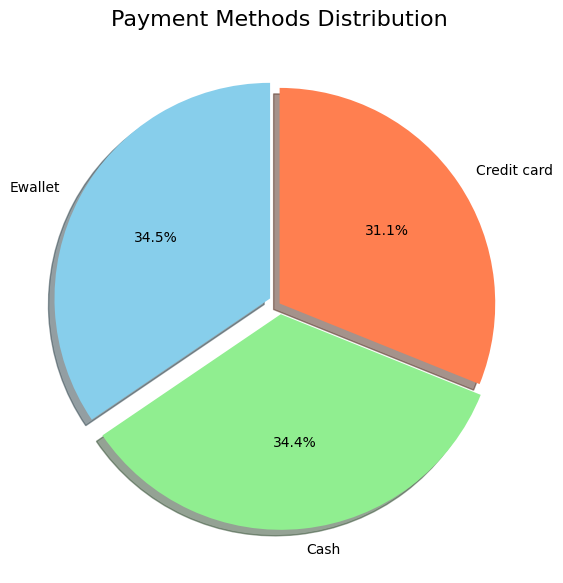

In [22]:
# pie chart showing the distribution of payment methods.

#Group and count the payment methods
payment_distribution = df["payment"].value_counts()

# Create the pie chart
plt.figure(figsize=(7, 7))
payment_distribution.plot(
    kind="pie",
    autopct="%1.1f%%", # Show percentages with a decimal
    colors=["skyblue", "lightgreen", "coral"],
    startangle=90,
    explode=(0.05, 0.05, 0),
    shadow=True
)

#Customation
plt.title("Payment Methods Distribution", fontsize=16)
plt.ylabel("")
plt.show()

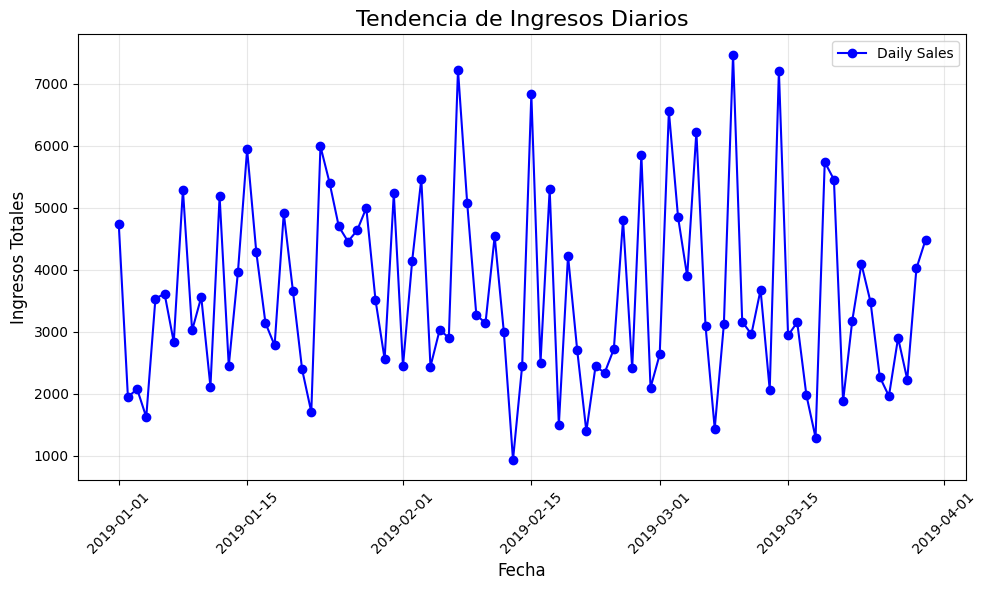

In [24]:
# Line chart to analyze daily income trend.

df["date"] = pd.to_datetime(df["date"])

daily_sales = df.groupby('date')['total'].sum()

#Create the line chart
plt.figure(figsize=(10, 6))
plt.plot(daily_sales.index, daily_sales.values, marker='o', linestyle='-', color="blue", label="Daily Sales")

plt.title("Tendencia de Ingresos Diarios", fontsize=16)
plt.xlabel("Fecha", fontsize=12)
plt.ylabel("Ingresos Totales", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()